$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

In [ ]:
import qiskit
from qiskit import QuantumCircuit, transpile, execute
from qiskit.extensions import UnitaryGate
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor










### Dirac Notation

$(1,0,0,0) \rightarrow \ket{00}$

$(0,1,0,0) \rightarrow \ket{01}$

$(0,0,1,0) \rightarrow \ket{10}$

$(0,0,0,1) \rightarrow \ket{11}$

# Measurement: Bell Operator Basis

*Physical Review Letters, 70:13, 1895. 29 March 1993*

Eqns 1,2

https://researcher.watson.ibm.com/researcher/files/us-bennetc/BBCJPW.pdf.

$U=\begin{bmatrix}
\Psi_{12}^{(+)}\\
\Psi_{12}^{(-)}\\
\Phi_{12}^{(+)}\\
\Phi_{12}^{(-)}
\end{bmatrix}=\begin{bmatrix}
0&1&1&0\\
0&-1&1&0\\
1&0&0&1\\
1&0&0&-1
\end{bmatrix}/\sqrt{2}$

$h_0\cdot X_0 \cdot X_1\cdot CNOT_{0,1}\cdot X_1 \cdot X_0=
(\begin{bmatrix}
1&1&0&0\\
1&-1&0&0\\
0&0&1&1\\
0&0&1&-1
\end{bmatrix}/\sqrt{2})
\begin{bmatrix}
0&1&0&0\\
1&0&0&0\\
0&0&0&1\\
0&0&1&0
\end{bmatrix}
\begin{bmatrix}
0&0&1&0\\
0&0&0&1\\
1&0&0&0\\
0&1&0&0
\end{bmatrix}\begin{bmatrix}
1&0&0&0\\
0&0&0&1\\
0&0&1&0\\
0&1&0&0
\end{bmatrix}
\begin{bmatrix}
0&0&1&0\\
0&0&0&1\\
1&0&0&0\\
0&1&0&0
\end{bmatrix}
\begin{bmatrix}
0&1&0&0\\
1&0&0&0\\
0&0&0&1\\
0&0&1&0
\end{bmatrix}
=\begin{bmatrix}
0&1&1&0\\
0&-1&1&0\\
1&0&0&1\\
1&0&0&-1
\end{bmatrix}/\sqrt{2}=U$






In [8]:
counts=[]
for input_state in [0,1]:
    particle_1=''
    if input_state == 1:
        particle_1 = 'x q[0]; //Particle 1 spin down\n'
    cloner1 = """
    OPENQASM 2.0;
    include "qelib1.inc";

    qreg q[3]; //Three particles
    creg c[3]; //Three classical bits
    
    h q[1]; // Alice entangles particles two and three to get Psi_{23}^-
    cx q[1], q[2];
    x q[1];

    z q[1];
    
    """ + particle_1 + \
    """
    
    x q[0]; // Measurement: Bell operator basis
    x q[1];
    cx q[0],q[1];
    x q[1];
    x q[0];
    h q[0];
    
    
    measure q[0]->c[0]; //Alice measurement
    measure q[1]->c[1];

    if (c == 0) z q[2]; //Eqn 6 - Bob's transformation to get the teleported qubit
    if (c == 3) x q[2]; // |11>
    if (c == 2) y q[2]; // |10>
    
    measure q[2]->c[2]; // Measure the teleported qubit
    """

    qc= QuantumCircuit.from_qasm_str(cloner1)
    backend=qiskit.BasicAer.get_backend('qasm_simulator')
    simulate = True
    if not simulate:
        IBMQ.load_account()
        provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
        for b in provider.backends():
            print(b)
        backend = provider.get_backend('ibmq_quito')    
        job = execute(qc, backend=backend, shots=1000)
        job_monitor(job)
        result = job.result()
    else:
        result = execute(qc, backend=backend,shots=1000).result()
    counts.append(result.get_counts())


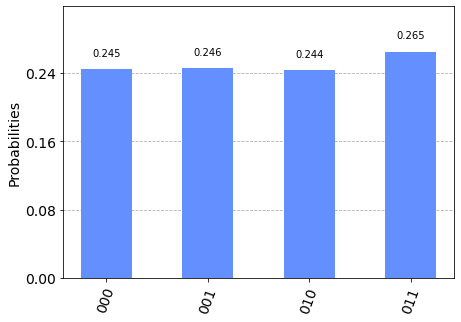

In [9]:
plot_histogram(counts[0])

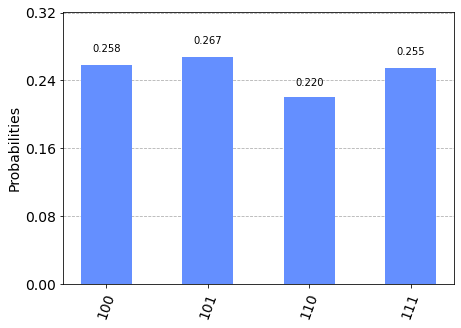

In [10]:
plot_histogram(counts[1])